In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Load and prepare the [CIFAR10 dataset](https://www.cs.toronto.edu/%7Ekriz/cifar.html). Convert the samples from integers to floating-point numbers:

In [2]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Check data shape and range

In [3]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
x_train.max(), x_train.min(), x_test.max(), x_test.min()

(1.0, 0.0, 1.0, 0.0)

Randomly plot a grid of data points

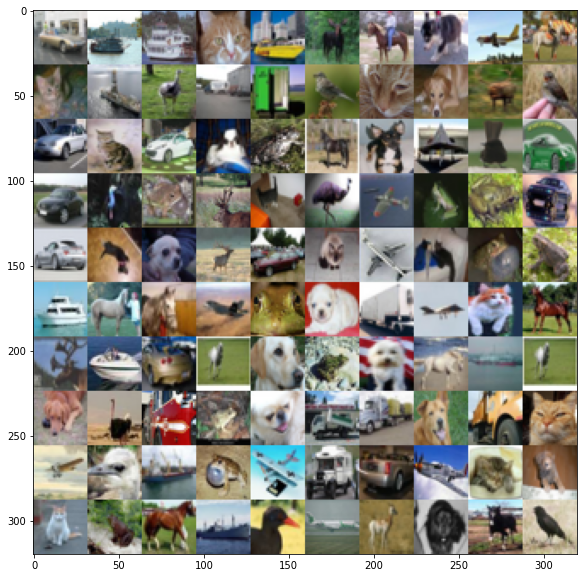

In [5]:
grid_size = 10
dim = x_train.shape[1]
selected = np.random.randint(x_train.shape[0], size=grid_size*grid_size)
data = np.zeros((dim*grid_size, dim*grid_size, 3))
for i, sid in enumerate(selected):
    row = i // grid_size
    col = i % grid_size
    data[row*dim:(row+1)*dim, col*dim:(col+1)*dim, :] = x_train[sid]
    
%matplotlib inline
plt.figure(1, figsize=(10,10))
plt.imshow(data)
plt.show()

Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=(dim, dim, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), input_shape=(dim, dim, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               295040    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

Train and evaluate the model:

In [8]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
391/391 [==============================] - 3s 9ms/step - loss: 1.5306 - accuracy: 0.4553 - val_loss: 1.2732 - val_accuracy: 0.5457
Epoch 2/5
391/391 [==============================] - 3s 8ms/step - loss: 1.1970 - accuracy: 0.5810 - val_loss: 1.0919 - val_accuracy: 0.6259
Epoch 3/5
391/391 [==============================] - 3s 7ms/step - loss: 1.0578 - accuracy: 0.6334 - val_loss: 1.0173 - val_accuracy: 0.6486
Epoch 4/5
391/391 [==============================] - 3s 8ms/step - loss: 0.9645 - accuracy: 0.6663 - val_loss: 0.9611 - val_accuracy: 0.6679
Epoch 5/5
391/391 [==============================] - 3s 8ms/step - loss: 0.8938 - accuracy: 0.6921 - val_loss: 0.9512 - val_accuracy: 0.6748
313/313 - 1s - loss: 0.9512 - accuracy: 0.6748


[0.9512266516685486, 0.6747999787330627]

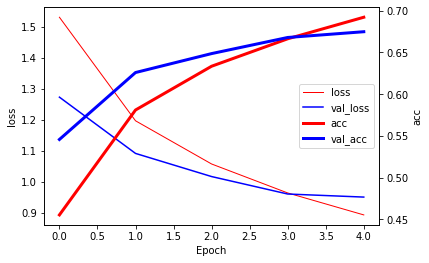

In [9]:
l1, = plt.plot(history.history['loss'], label='loss', color='red', linewidth=1)
l2, = plt.plot(history.history['val_loss'], label='val_loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('loss')
ax = plt.twinx()
l3, = ax.plot(history.history['accuracy'], label='acc', color='red', linewidth=3)
l4, = ax.plot(history.history['val_accuracy'], label='val_acc', color='blue', linewidth=3)
ax.set_ylabel('acc')

lines = [l1, l2, l3, l4]
plt.legend(lines,  [l.get_label() for l in lines], loc=5)
plt.show()

Can you improve the accuracy?

### Bonus: Improve the accuracy with state-of-the-art CNNs and transfer learning

In [10]:
backbone = tf.keras.applications.ResNet50(include_top=False, input_shape=(dim,dim, 3), classes=10)

In [14]:
backbone.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [15]:
model_advanced = tf.keras.models.Sequential()
model_advanced.add(backbone)
model_advanced.add(tf.keras.layers.Flatten())
model_advanced.add(tf.keras.layers.Dense(128, activation='relu'))
model_advanced.add(tf.keras.layers.Dense(10, activation='softmax'))

model_advanced.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_advanced.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 23,851,274
Trainable params: 23,798,154
Non-trainable params: 53,120
_________________________________________________________________


In [16]:
history = model_advanced.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

model_advanced.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
391/391 [==============================] - 21s 55ms/step - loss: 0.9202 - accuracy: 0.7162 - val_loss: 2.7849 - val_accuracy: 0.4850
Epoch 2/5
391/391 [==============================] - 20s 51ms/step - loss: 0.6921 - accuracy: 0.7659 - val_loss: 0.8310 - val_accuracy: 0.7274
Epoch 3/5
391/391 [==============================] - 20s 51ms/step - loss: 0.5049 - accuracy: 0.8264 - val_loss: 0.7391 - val_accuracy: 0.7653
Epoch 4/5
391/391 [==============================] - 20s 51ms/step - loss: 0.3951 - accuracy: 0.8661 - val_loss: 0.8640 - val_accuracy: 0.7443
Epoch 5/5
391/391 [==============================] - 20s 51ms/step - loss: 0.3282 - accuracy: 0.8877 - val_loss: 0.9182 - val_accuracy: 0.7394
313/313 - 4s - loss: 0.9182 - accuracy: 0.7394


[0.9182215929031372, 0.7394000291824341]

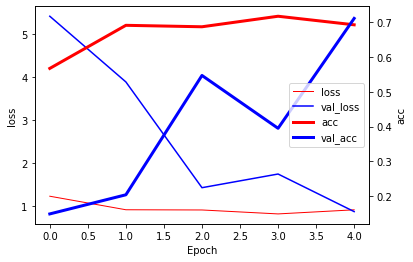

In [13]:
l1, = plt.plot(history.history['loss'], label='loss', color='red', linewidth=1)
l2, = plt.plot(history.history['val_loss'], label='val_loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('loss')
ax = plt.twinx()
l3, = ax.plot(history.history['accuracy'], label='acc', color='red', linewidth=3)
l4, = ax.plot(history.history['val_accuracy'], label='val_acc', color='blue', linewidth=3)
ax.set_ylabel('acc')

lines = [l1, l2, l3, l4]
plt.legend(lines,  [l.get_label() for l in lines], loc=5)
plt.show()